# 시계열 모델을 이용한 일조 예측

### 분석 순서 
1. 모듈 import
2. 데이터 read 및 전처리
3. ARMA

### 1. 모듈 import

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas import DataFrame, datetime
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### 2. 데이터 read 및 전처리

In [137]:
wt_train = pd.read_excel("F:\\2차 제출 데이터\\A_site_fin.xlsx", sheet_name=0)
wt_test = pd.read_excel("F:\\2차 제출 데이터\\0305_0307_update_15min.xlsx")          

wt_train = wt_train.set_index('time')
wt_test = wt_test.set_index('Time')

#### 2-1. 데이터 타입 변환  

In [138]:
wt_test = wt_test.astype('float64')
wt_train = wt_train.astype('float64')

#### 2-2. 데이터 셋 정의  

In [139]:
endog = wt_train[['sunshine','temp','dailyAccRain','wind_velocity','airpressure','sealevelpressure','humidity',
                 'cloud']]
exog = wt_test[['temp','dailyAccRain','wind_velocity','airpressure','sealevelpressure','humidity','cloud']]

data = endog.append(exog, sort=False)

In [140]:
endog = data.loc[:'2019-02-23 17:45:00',:]
exog = data.loc['2019-03-05 09:00:00':, :]

#### 2-3. X, Y변수 설정  

In [141]:
y = endog['sunshine']
x = endog.drop(endog.columns[0], axis=1)    #sunshine, SolarRad 제외

In [142]:
exog = exog.drop(exog.columns[0], axis=1)

### 3. ARMA 모형

In [143]:
model = sm.tsa.ARMA(y, (1,1), exog=x)
r = model.fit()
print(r.summary())

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               sunshine   No. Observations:                 3024
Model:                     ARMA(1, 1)   Log Likelihood                6238.375
Method:                       css-mle   S.D. of innovations              0.031
Date:                Wed, 06 Mar 2019   AIC                         -12454.749
Time:                        23:28:56   BIC                         -12388.591
Sample:                             0   HQIC                        -12430.962
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.2588      0.956     -4.455      0.000      -6.132      -2.385
temp                 0.0042      0.001      5.164      0.000       0.003       0.006
dailyAccRain        -0.0048 

#### 3-1. ACF plot

<Figure size 2160x1080 with 0 Axes>

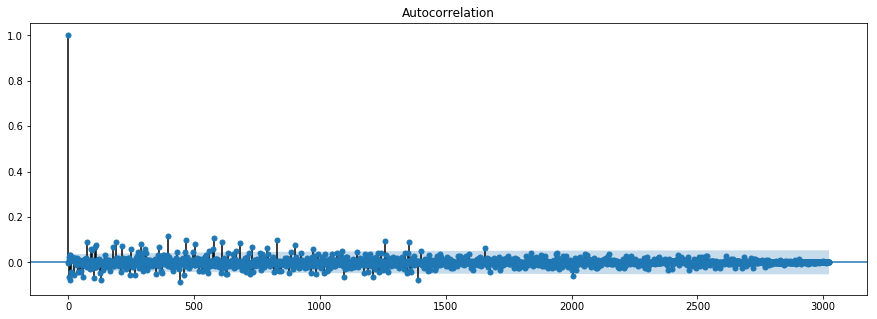

In [144]:
plt.figure(figsize=(30,15))
sm.tsa.graphics.plot_acf(r.resid);

#### 3-2. PACF plot  

C:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


<Figure size 2160x1080 with 0 Axes>

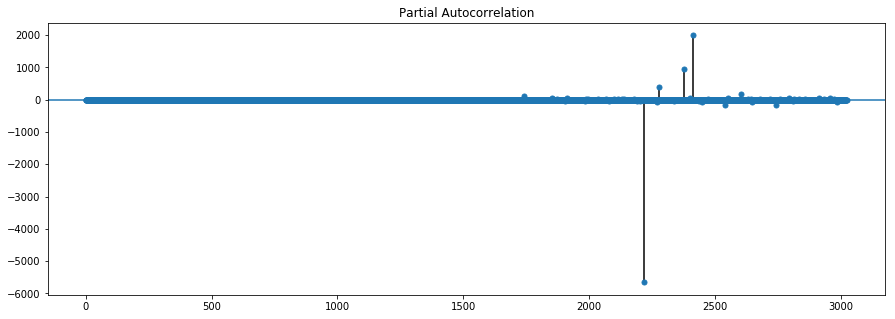

In [99]:
plt.figure(figsize=(30,15))
sm.tsa.graphics.plot_pacf(r.resid);

#### 3-3. 일조 예측

In [145]:
yhat = r.predict(start=3024, end=3131, exog=exog)

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [146]:
yhat

3024    0.085908
3025    0.078781
3026    0.072275
3027    0.066335
3028    0.101330
3029    0.096379
3030    0.091860
3031    0.087733
3032    0.118834
3033    0.115395
3034    0.112256
3035    0.109389
3036    0.135782
3037    0.133393
3038    0.131212
3039    0.129221
3040    0.163537
3041    0.161877
3042    0.160362
3043    0.158979
3044    0.158774
3045    0.157621
3046    0.156569
3047    0.155608
3048    0.150576
3049    0.149775
3050    0.149044
3051    0.148376
3052    0.136769
3053    0.136213
          ...   
3102    0.175170
3103    0.175164
3104    0.205934
3105    0.205929
3106    0.205925
3107    0.205921
3108    0.225327
3109    0.225323
3110    0.225320
3111    0.225317
3112    0.235739
3113    0.235737
3114    0.235735
3115    0.235733
3116    0.241178
3117    0.241176
3118    0.241175
3119    0.241173
3120    0.237018
3121    0.237017
3122    0.237016
3123    0.237015
3124    0.229055
3125    0.229054
3126    0.229053
3127    0.229053
3128    0.218916
3129    0.2189

In [147]:
#exog의 index를 칼럼으로 빼낸 후, index 칼럼을 time 칼럼으로 사용
exog1 = exog.reset_index()
yhat_ = pd.DataFrame(yhat)
yhat_ = yhat_.reset_index()
result = pd.DataFrame({"pred_sunshine":yhat_[0],"time":exog1['index']})

In [148]:
result

,pred_sunshine,time
0,0.085908,2019-03-05 09:00:00
1,0.078781,2019-03-05 09:15:00
2,0.072275,2019-03-05 09:30:00
3,0.066335,2019-03-05 09:45:00
4,0.101330,2019-03-05 10:00:00
5,0.096379,2019-03-05 10:15:00
6,0.091860,2019-03-05 10:30:00
7,0.087733,2019-03-05 10:45:00
8,0.118834,2019-03-05 11:00:00
9,0.115395,2019-03-05 11:15:00


#### 3-4. 결과값 추세 확인  

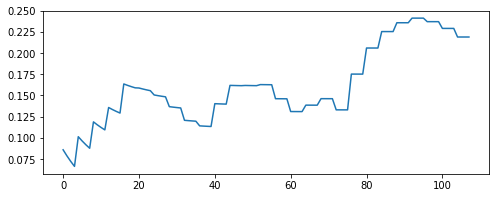

In [149]:
plt.figure(figsize=(8,3))
plt.plot(result['pred_sunshine'])

In [49]:
result.to_excel('F:\\2차 제출 데이터\\sunshine_forecast.xlsx', 'sheet1',index=False, engine='xlsxwriter')